# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Extracting movies links:
l = soup.find_all('a')
for l2 in l:
  l3 = l2.get('href')
  if '2000' not in l3 and 'https' not in l3 and len(l3)>10:
    print(l3,len(l3))

/in/lists/public-lists 22
/in/movie/oppenheimer 21
/in/movie/dune-2021 19
/in/movie/animal-2022 21
/in/movie/salaar 16
/in/movie/dunki 15
/in/movie/poor-things 21
/in/movie/12th-fail 19
/in/movie/hanu-man 18
/in/movie/the-kerala-story 26
/in/movie/anyone-but-you 24
/in/movie/sam-bahadur 21
/in/movie/eagle-2024 20
/in/movie/article-370 21
/in/movie/merry-christmas-2024 30
/in/movie/ayalaan 17
/in/movie/untitled-shahid-kapoor-kriti-sanon-film 49
/in/movie/captain-miller 24
/in/movie/ssmb-28 17
/in/movie/fighter-2022 22
/in/movie/anatomie-dune-chute 29
/in/movie/anweshippin-kandethum 31
/in/movie/aquaman-and-the-lost-kingdom 38
/in/movie/manjummel-boys 24
/in/movie/dune-part-two 23
/in/movie/jawan 15
/in/movie/code-8 16
/in/movie/bramayugam 20
/in/movie/untitled-cord-jefferson-film 38
/in/movie/laapataa-ladies 25
/in/movie/damsel-2023 21
/in/movie/singapore-saloon 26
/in/movie/365-days 18
/in/movie/crakk-jeetegaa-toh-jiyegaa 36
/in/movie/sound-of-freedom 26
/in/movie/the-zone-of-interest 

In [ ]:
# Creating movie urls and saving it in a list:
list_new_link = []

links = soup.find_all('a')

for link in links:
  link = link.get('href')
  if '2000' not in link and 'https' not in link and len(link)>10:
    new_link = 'https://www.justwatch.com'+link
    list_new_link.append(new_link)


index = 0
for i in list_new_link:
  print(index, i)
  index+=1

0 https://www.justwatch.com/in/lists/public-lists
1 https://www.justwatch.com/in/movie/oppenheimer
2 https://www.justwatch.com/in/movie/dune-2021
3 https://www.justwatch.com/in/movie/animal-2022
4 https://www.justwatch.com/in/movie/salaar
5 https://www.justwatch.com/in/movie/dunki
6 https://www.justwatch.com/in/movie/poor-things
7 https://www.justwatch.com/in/movie/12th-fail
8 https://www.justwatch.com/in/movie/hanu-man
9 https://www.justwatch.com/in/movie/the-kerala-story
10 https://www.justwatch.com/in/movie/anyone-but-you
11 https://www.justwatch.com/in/movie/sam-bahadur
12 https://www.justwatch.com/in/movie/eagle-2024
13 https://www.justwatch.com/in/movie/article-370
14 https://www.justwatch.com/in/movie/merry-christmas-2024
15 https://www.justwatch.com/in/movie/ayalaan
16 https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film
17 https://www.justwatch.com/in/movie/captain-miller
18 https://www.justwatch.com/in/movie/ssmb-28
19 https://www.justwatch.com/in/movie/

Now writing a function for fetching various columns of a dataset

In [ ]:
def extract_data_frame(new_links, movie_or_show):
    extract_info = []

    for link in new_links:

      url2 = link
      page2 = requests.get(url2)
      soup2 = BeautifulSoup(page2.text, 'lxml')

      name = extract_name(soup2)
      year = extract_release_year(soup2)
      provider = extract_provider(soup2)
      genre = extract_genre_info(soup2)
      rating = extract_rating_info(soup2)
      runtime = extract_runtime_info(soup2)
      age_rating = extract_age_rating_info(soup2)
      country = extract_country_info(soup2)

      extract_info.append({movie_or_show: name, 'Year': year, 'Provider': provider, 'Genre':genre, 'Rating_Votes':rating, 'Runtime': runtime ,'Age_rating':age_rating,'Country':country})


   # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(extract_info)
    return df

def extract_name(soup):
  names = soup.find_all('h1')
  for name in names:
    return name.text.strip()

def extract_release_year(soup):
  release_year = soup.find_all('span', class_='text-muted')

  for year in release_year:
    return year.text.strip()

def extract_provider(soup):
    pictures = soup.find_all('picture', class_='picture-wrapper')
    for picture in pictures:
        return picture.findChild('img').get('alt', 'No alt tag found')

def extract_genre_info(soup):
    genre_info = ""
    genre_infos = soup.find_all('div', class_='detail-infos')
    for genre in genre_infos:
        genre_subheading = genre.find('h3', class_='detail-infos__subheading')
        if genre_subheading and genre_subheading.text.strip() == 'Genres':
           genre_name = genre.find('div', class_='detail-infos__value').text.strip()
           genre_info = genre_name
    return genre_info


def extract_rating_info(soup):
    rating_info = ""
    rating_infos = soup.find_all('div', class_='detail-infos')
    for rating in rating_infos:
        rating_subheading = rating.find('h3', class_='detail-infos__subheading')
        if rating_subheading and rating_subheading.text.strip() == 'Rating':
           rating_name = rating.find('div', class_='detail-infos__value').text.strip()
           rating_info = rating_name
    return rating_info


def extract_runtime_info(soup):
    runtime_info = ""
    runtime_infos = soup.find_all('div', class_='detail-infos')
    for runtime in runtime_infos:
       runtime_subheading = runtime.find('h3', class_='detail-infos__subheading')
       if runtime_subheading and runtime_subheading.text.strip() == 'Runtime':
          runtime_name = runtime.find('div', class_='detail-infos__value').text.strip()
          runtime_info = runtime_name
    return runtime_info


def extract_age_rating_info(soup):
    age_rating_info = ""
    age_rating_infos = soup.find_all('div', class_='detail-infos')
    for rating in age_rating_infos:
       rating_subheading = rating.find('h3', class_='detail-infos__subheading')
       if rating_subheading and rating_subheading.text.strip() == 'Age rating':
          rating_name = rating.find('div', class_='detail-infos__value').text.strip()
          age_rating_info = rating_name
    return age_rating_info

def extract_country_info(soup):
    country_info = ""
    country_infos = soup.find_all('div', class_='detail-infos')
    for country in country_infos:
       country_subheading = country.find('h3', class_='detail-infos__subheading')
       if country_subheading and country_subheading.text.strip() == 'Production country':
          country_name = country.find('div', class_='detail-infos__value').text.strip()
          country_info = country_name
    return country_info

We are framing dataframe so that we can fetch all the necessary details very easily

In [ ]:
# Calling extract data frame function to extract movie data and convert it to a dataframe:
link = list_new_link
df_movies = extract_data_frame(link, 'Movie')

In [ ]:
df_movies.head(10)

,Movie,Year,Provider,Genre,Rating_Votes,Runtime,Age_rating,Country
0,None,None,None,,,,,
1,Oppenheimer (2023),(2023),Apple TV,"History, Drama",8.4 (677k),3h 0min,UA,"United States, United Kingdom"
2,Dune (2021),(2021),Apple TV,"Science-Fiction, Drama, Action & Adventure",8.0 (809k),2h 35min,UA,United States
3,Animal (2023),(2023),Netflix,"Action & Adventure, Crime, Drama, Mystery & Th...",6.3 (85k),3h 21min,A,India
4,Salaar (2023),(2023),Netflix,"Drama, Mystery & Thriller, Action & Adventure,...",6.5 (61k),2h 55min,A,India
5,Dunki (2023),(2023),Netflix,"Comedy, Drama",6.7 (70k),2h 40min,,India
6,Poor Things (2023),(2023),Apple TV,"Romance, Comedy, Science-Fiction, Drama",8.1 (169k),2h 22min,A,"United States, Ireland, United Kingdom"
7,12th Fail (2023),(2023),Hotstar,"Drama, History",9.0 (104k),2h 27min,,India
8,Hanu-Man (2024),(2024),None,"Action & Adventure, Comedy, Science-Fiction, F...",8.4 (18k),2h 39min,UA,India
9,The Kerala Story (2023),(2023),Zee5,Drama,7.0 (70k),2h 18min,A,India


In [ ]:
df_movies.shape

(138, 8)

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here

# Extracting movies name:
df_movies_name = df_movies['Movie']
df_movies_name.head(10)


0                        None
1         Oppenheimer  (2023)
2                Dune  (2021)
3              Animal  (2023)
4              Salaar  (2023)
5               Dunki  (2023)
6         Poor Things  (2023)
7           12th Fail  (2023)
8            Hanu-Man  (2024)
9    The Kerala Story  (2023)
Name: Movie, dtype: object

## **Scrapping release Year**

In [ ]:
# Write Your Code here

# Extracting release year:
df_movies_year = df_movies['Year']
df_movies_year.head(10)

0      None
1    (2023)
2    (2021)
3    (2023)
4    (2023)
5    (2023)
6    (2023)
7    (2023)
8    (2024)
9    (2023)
Name: Year, dtype: object

In [ ]:
df_movies_year.unique()

array([None, '(2023)', '(2021)', '(2024)', '(2019)', '(2020)', '(2001)',
       '(2008)', '(2011)'], dtype=object)

## **Scrapping Genres**

In [ ]:
# Write Your Code here

# Extracting movies genres:
df_movies_genre = df_movies['Genre']

df_movies_genre.head(10)


0                                                     
1                                       History, Drama
2           Science-Fiction, Drama, Action & Adventure
3    Action & Adventure, Crime, Drama, Mystery & Th...
4    Drama, Mystery & Thriller, Action & Adventure,...
5                                        Comedy, Drama
6              Romance, Comedy, Science-Fiction, Drama
7                                       Drama, History
8    Action & Adventure, Comedy, Science-Fiction, F...
9                                                Drama
Name: Genre, dtype: object

In [ ]:
df_movies_genre.unique()

array(['', 'History, Drama', 'Science-Fiction, Drama, Action & Adventure',
       'Action & Adventure, Crime, Drama, Mystery & Thriller',
       'Drama, Mystery & Thriller, Action & Adventure, Crime',
       'Comedy, Drama', 'Romance, Comedy, Science-Fiction, Drama',
       'Drama, History',
       'Action & Adventure, Comedy, Science-Fiction, Fantasy', 'Drama',
       'Comedy, Romance', 'War & Military, Drama',
       'Mystery & Thriller, Action & Adventure',
       'Mystery & Thriller, Action & Adventure, Drama',
       'Drama, Mystery & Thriller', 'Science-Fiction, Action & Adventure',
       'Science-Fiction, Comedy, Drama, Romance',
       'Mystery & Thriller, Action & Adventure, Drama, War & Military',
       'Action & Adventure, Drama',
       'Action & Adventure, Mystery & Thriller, War & Military',
       'Mystery & Thriller, Crime, Drama',
       'Crime, Drama, Mystery & Thriller',
       'Action & Adventure, Fantasy, Science-Fiction',
       'Mystery & Thriller, Drama',
    

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here

# Extracting movies rating:
df_movies_rating = df_movies['Rating_Votes']
df_movies_rating.head(10)


0               
1    8.4  (677k)
2    8.0  (809k)
3     6.3  (85k)
4     6.5  (61k)
5     6.7  (70k)
6    8.1  (169k)
7    9.0  (104k)
8     8.4  (18k)
9     7.0  (70k)
Name: Rating_Votes, dtype: object

In [ ]:
df_movies_rating.unique()

array(['', '8.4  (677k)', '8.0  (809k)', '6.3  (85k)', '6.5  (61k)',
       '6.7  (70k)', '8.1  (169k)', '9.0  (104k)', '8.4  (18k)',
       '7.0  (70k)', '6.2  (50k)', '7.8  (14k)', '6.8  (3k)', '8.5  (9k)',
       '7.2  (21k)', '6.0  (3k)', '7.0  (42k)', '6.6  (5k)', '5.4  (19k)',
       '6.9  (37k)', '7.8  (88k)', '7.6  (3k)', '5.6  (71k)', '8.7  (4k)',
       '8.9  (215k)', '7.0  (93k)', '6.1  (49k)', '8.4  (3k)',
       '7.6  (51k)', '8.4  (1k)', '6.2  (31k)', '6.2', '3.3  (97k)',
       '6.4  (4k)', '7.7  (110k)', '7.5  (54k)', '8.3  (2k)',
       '7.6  (851k)', '8.0  (119k)', '6.1  (15k)', '6.9  (512k)',
       '6.4  (66k)', '6.4  (3k)', '8.3  (45k)', '7.2  (57k)',
       '7.6  (515k)', '5.8  (52k)', '7.0  (165k)', '6.7  (204k)',
       '8.9  (84k)'], dtype=object)

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here

# Extracting movies runtime:
df_movies_runtime = df_movies['Runtime']
df_movies_runtime.head(10)

0            
1     3h 0min
2    2h 35min
3    3h 21min
4    2h 55min
5    2h 40min
6    2h 22min
7    2h 27min
8    2h 39min
9    2h 18min
Name: Runtime, dtype: object

In [ ]:
df_movies_runtime.describe()

count     138
unique     40
top          
freq       88
Name: Runtime, dtype: object

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here

# Extracting movies age rating:
df_movies_age_rating = df_movies['Age_rating']
df_movies_age_rating.head(10)

0      
1    UA
2    UA
3     A
4     A
5      
6     A
7      
8    UA
9     A
Name: Age_rating, dtype: object

In [ ]:
df_movies_age_rating.value_counts()

      111
UA     18
A       6
U       3
Name: Age_rating, dtype: int64

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here

# Extracting movies production country:
df_movies_country = df_movies['Country']

df_movies_country.head(10)

0                                          
1             United States, United Kingdom
2                             United States
3                                     India
4                                     India
5                                     India
6    United States, Ireland, United Kingdom
7                                     India
8                                     India
9                                     India
Name: Country, dtype: object

In [ ]:
df_movies_country.value_counts()

                                          88
India                                     27
United States                             10
United Kingdom, United States              4
United States, United Kingdom              2
United States, Ireland, United Kingdom     1
United States, Australia                   1
France                                     1
Canada, United Kingdom, United States      1
Poland                                     1
United Kingdom, United States, Poland      1
Japan                                      1
Name: Country, dtype: int64

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here

# Extracting movies streaming provider:
df_movies_provider = df_movies['Provider']
df_movies_provider.head(10)

0        None
1    Apple TV
2    Apple TV
3     Netflix
4     Netflix
5     Netflix
6    Apple TV
7     Hotstar
8        None
9        Zee5
Name: Provider, dtype: object

In [ ]:
df_movies_provider.unique()

array([None, 'Apple TV', 'Netflix', 'Hotstar', 'Zee5',
       'Amazon Prime Video', 'Sun Nxt', 'Bookmyshow', 'Sony Liv',
       'Jio Cinema'], dtype=object)

In [ ]:
df_movies_provider.value_counts()

Apple TV              11
Netflix                9
Amazon Prime Video     9
Bookmyshow             9
Zee5                   2
Hotstar                1
Sun Nxt                1
Sony Liv               1
Jio Cinema             1
Name: Provider, dtype: int64

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here

df_movies.head(10)

,Movie,Year,Provider,Genre,Rating_Votes,Runtime,Age_rating,Country
0,None,None,None,,,,,
1,Oppenheimer (2023),(2023),Apple TV,"History, Drama",8.4 (677k),3h 0min,UA,"United States, United Kingdom"
2,Dune (2021),(2021),Apple TV,"Science-Fiction, Drama, Action & Adventure",8.0 (809k),2h 35min,UA,United States
3,Animal (2023),(2023),Netflix,"Action & Adventure, Crime, Drama, Mystery & Th...",6.3 (85k),3h 21min,A,India
4,Salaar (2023),(2023),Netflix,"Drama, Mystery & Thriller, Action & Adventure,...",6.5 (61k),2h 55min,A,India
5,Dunki (2023),(2023),Netflix,"Comedy, Drama",6.7 (70k),2h 40min,,India
6,Poor Things (2023),(2023),Apple TV,"Romance, Comedy, Science-Fiction, Drama",8.1 (169k),2h 22min,A,"United States, Ireland, United Kingdom"
7,12th Fail (2023),(2023),Hotstar,"Drama, History",9.0 (104k),2h 27min,,India
8,Hanu-Man (2024),(2024),None,"Action & Adventure, Comedy, Science-Fiction, F...",8.4 (18k),2h 39min,UA,India
9,The Kerala Story (2023),(2023),Zee5,Drama,7.0 (70k),2h 18min,A,India


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here

# Extracting tv-shows links:
tv_link = soup.find_all('a')
for l2 in tv_link:
  l3 = l2.get('href')
  if '2000' not in l3 and 'https' not in l3 and len(l3)>10:
    print(l3,len(l3))

/in/lists/public-lists 22
/in/tv-show/shogun-2024 23
/in/tv-show/panchayat 21
/in/tv-show/mirzapur 20
/in/tv-show/game-of-thrones 27
/in/tv-show/avatar-the-last-airbender 37
/in/tv-show/sunflower-2021 26
/in/tv-show/solo-leveling-2024 30
/in/tv-show/maharani-2021 25
/in/tv-show/true-detective 26
/in/tv-show/young-sheldon 25
/in/tv-show/aarya 17
/in/tv-show/poacher 19
/in/tv-show/maamla-legal-hai 28
/in/tv-show/one-day 19
/in/tv-show/mastram 19
/in/tv-show/farzi 17
/in/tv-show/death-and-other-details 35
/in/tv-show/jujutsu-kaisen 26
/in/tv-show/avatar-the-last-airbender-2005 42
/in/tv-show/halo 16
/in/tv-show/criminal-justice-2019 33
/in/tv-show/the-gentlemen 25
/in/tv-show/indian-police-force 31
/in/tv-show/yellowstone 23
/in/tv-show/jack-reacher 24
/in/tv-show/supersex 20
/in/tv-show/scam-1992 21
/in/tv-show/loki 16
/in/tv-show/euphoria 20
/in/tv-show/the-twelve 22
/in/tv-show/the-rookie 22
/in/tv-show/paperhouse 22
/in/tv-show/the-family-man 26
/in/tv-show/aashram 19
/in/tv-show/gand

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here

# Creating tv-shows urls and saving in a list:
tv_list_links = []

tv_links = soup.find_all('a')

for link in tv_links:
  link = link.get('href')
  if '2000' not in link and 'https' not in link and len(link)>10:

    new_link = 'https://www.justwatch.com'+link
    tv_list_links.append(new_link)

In [ ]:
# Printing the tv-shows urls:
index = 0
for i in tv_list_links:
  print(index, i)
  index+=1

0 https://www.justwatch.com/in/lists/public-lists
1 https://www.justwatch.com/in/tv-show/shogun-2024
2 https://www.justwatch.com/in/tv-show/panchayat
3 https://www.justwatch.com/in/tv-show/mirzapur
4 https://www.justwatch.com/in/tv-show/game-of-thrones
5 https://www.justwatch.com/in/tv-show/avatar-the-last-airbender
6 https://www.justwatch.com/in/tv-show/sunflower-2021
7 https://www.justwatch.com/in/tv-show/solo-leveling-2024
8 https://www.justwatch.com/in/tv-show/maharani-2021
9 https://www.justwatch.com/in/tv-show/true-detective
10 https://www.justwatch.com/in/tv-show/young-sheldon
11 https://www.justwatch.com/in/tv-show/aarya
12 https://www.justwatch.com/in/tv-show/poacher
13 https://www.justwatch.com/in/tv-show/maamla-legal-hai
14 https://www.justwatch.com/in/tv-show/one-day
15 https://www.justwatch.com/in/tv-show/mastram
16 https://www.justwatch.com/in/tv-show/farzi
17 https://www.justwatch.com/in/tv-show/death-and-other-details
18 https://www.justwatch.com/in/tv-show/jujutsu-kais

 Here only creating data drame so that we can easily fetch the upcoming details

In [ ]:
# Calling extract dataframe function to extract tv-show data and convert it to a dataframe:
tv_link = tv_list_links
df_shows = extract_data_frame(tv_link, 'TV-show')
df_shows.head(10)

,TV-show,Year,Provider,Genre,Rating_Votes,Runtime,Age_rating,Country
0,None,None,None,,,,,
1,Shōgun (2024),(2024),Hotstar,"Drama, War & Military, History",9.2 (29k),57min,,United States
2,Panchayat (2020),(2020),Amazon Prime Video,"Comedy, Drama",8.9 (84k),33min,,India
3,Mirzapur (2018),(2018),Amazon Prime Video,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5 (81k),50min,,India
4,Game of Thrones (2011),(2011),Jio Cinema,"Science-Fiction, Drama, Action & Adventure, Fa...",9.2 (2m),59min,U,United States
5,Avatar: The Last Airbender (2024),(2024),Netflix,"Science-Fiction, Action & Adventure, Drama, Ki...",7.3 (54k),54min,,United States
6,Sunflower (2021),(2021),VI movies and tv,"Crime, Comedy",7.5 (23k),37min,A,India
7,Solo Leveling (2024),(2024),Crunchyroll,"Action & Adventure, Fantasy, Animation, Scienc...",8.5 (10k),24min,,"Japan, South Korea"
8,Maharani (2021),(2021),Sony Liv,Drama,7.9 (9k),44min,UA,India
9,True Detective (2014),(2014),Jio Cinema,"Drama, Crime, Mystery & Thriller",8.9 (649k),1h 1min,U,United States


In [ ]:
df_shows.shape

(138, 8)

In [ ]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TV-show       52 non-null     object
 1   Year          50 non-null     object
 2   Provider      47 non-null     object
 3   Genre         138 non-null    object
 4   Rating_Votes  138 non-null    object
 5   Runtime       138 non-null    object
 6   Age_rating    138 non-null    object
 7   Country       138 non-null    object
dtypes: object(8)
memory usage: 8.8+ KB


## **Fetching Release Year**

In [ ]:
# Write Your Code here

# Extracting tv-shows name:
df_shows_year = df_shows['Year']
df_shows_year.head(10)

0      None
1    (2024)
2    (2020)
3    (2018)
4    (2011)
5    (2024)
6    (2021)
7    (2024)
8    (2021)
9    (2014)
Name: Year, dtype: object

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here

# Extracting tv-shows genre:
df_shows_genre = df_shows['Genre']
df_shows_genre.head(10)

0                                                     
1                       Drama, War & Military, History
2                                        Comedy, Drama
3    Crime, Action & Adventure, Drama, Mystery & Th...
4    Science-Fiction, Drama, Action & Adventure, Fa...
5    Science-Fiction, Action & Adventure, Drama, Ki...
6                                        Crime, Comedy
7    Action & Adventure, Fantasy, Animation, Scienc...
8                                                Drama
9                     Drama, Crime, Mystery & Thriller
Name: Genre, dtype: object

In [ ]:
df_shows_genre.unique()

array(['', 'Drama, War & Military, History', 'Comedy, Drama',
       'Crime, Action & Adventure, Drama, Mystery & Thriller',
       'Science-Fiction, Drama, Action & Adventure, Fantasy',
       'Science-Fiction, Action & Adventure, Drama, Kids & Family, Fantasy, Comedy',
       'Crime, Comedy',
       'Action & Adventure, Fantasy, Animation, Science-Fiction', 'Drama',
       'Drama, Crime, Mystery & Thriller', 'Kids & Family, Comedy',
       'Crime, Drama, Mystery & Thriller, Action & Adventure',
       'Crime, Drama', 'Comedy, Drama, Romance', 'Drama, Fantasy, Comedy',
       'Crime, Drama, Mystery & Thriller',
       'Animation, Action & Adventure, Fantasy, Mystery & Thriller, Science-Fiction',
       'Action & Adventure, Science-Fiction, Animation, Kids & Family, Fantasy',
       'Action & Adventure, Science-Fiction, Mystery & Thriller, War & Military',
       'Drama, Mystery & Thriller, Crime',
       'Comedy, Crime, Action & Adventure, Drama',
       'Action & Adventure, Crime', '

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here

# Extracting tv-show rating:
df_shows_rating = df_shows['Rating_Votes']
df_shows_rating.head(10)

0               
1     9.2  (29k)
2     8.9  (84k)
3     8.5  (81k)
4      9.2  (2m)
5     7.3  (54k)
6     7.5  (23k)
7     8.5  (10k)
8      7.9  (9k)
9    8.9  (649k)
Name: Rating_Votes, dtype: object

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
# Extracting tv-shows age rating:
df_shows_age_rating = df_shows['Age_rating']
df_shows_age_rating.head(10)

0      
1      
2      
3      
4     U
5      
6     A
7      
8    UA
9     U
Name: Age_rating, dtype: object

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
# Extracting tv-shows production country:
df_shows_country = df_shows['Country']
df_shows_country.head(10)

0                      
1         United States
2                 India
3                 India
4         United States
5         United States
6                 India
7    Japan, South Korea
8                 India
9         United States
Name: Country, dtype: object

In [ ]:
df_shows_country.unique()

array(['', 'United States', 'India', 'Japan, South Korea',
       'United States, India', 'United Kingdom', 'Japan, United States',
       'United States, United Kingdom', 'Italy', 'Belgium', 'Spain',
       'Japan'], dtype=object)

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here

# Extracting tv-shows streaming service provider:
df_shows_provider = df_shows['Provider']
df_shows_provider.head()

0                  None
1               Hotstar
2    Amazon Prime Video
3    Amazon Prime Video
4            Jio Cinema
Name: Provider, dtype: object

In [ ]:
df_shows_provider.value_counts()

Netflix               13
Amazon Prime Video     8
Hotstar                7
Jio Cinema             6
Sony Liv               3
Crunchyroll            2
VI movies and tv       1
MX Player              1
Alt Balaji             1
Apple TV Plus          1
Lionsgate Play         1
Amazon miniTV          1
Apple TV               1
Zee5                   1
Name: Provider, dtype: int64

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
# Extracting tv-shows runtime:
df_shows_runtime = df_shows['Runtime']
df_shows_runtime.head()

0         
1    57min
2    33min
3    50min
4    59min
Name: Runtime, dtype: object

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
df_shows.head()

,TV-show,Year,Provider,Genre,Rating_Votes,Runtime,Age_rating,Country
0,None,None,None,,,,,
1,Shōgun (2024),(2024),Hotstar,"Drama, War & Military, History",9.2 (29k),57min,,United States
2,Panchayat (2020),(2020),Amazon Prime Video,"Comedy, Drama",8.9 (84k),33min,,India
3,Mirzapur (2018),(2018),Amazon Prime Video,"Crime, Action & Adventure, Drama, Mystery & Th...",8.5 (81k),50min,,India
4,Game of Thrones (2011),(2011),Jio Cinema,"Science-Fiction, Drama, Action & Adventure, Fa...",9.2 (2m),59min,U,United States


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here

# for movies

list(df_movies.columns)

['Movie',
 'Year',
 'Provider',
 'Genre',
 'Rating_Votes',
 'Runtime',
 'Age_rating',
 'Country']

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie         52 non-null     object
 1   Year          50 non-null     object
 2   Provider      44 non-null     object
 3   Genre         138 non-null    object
 4   Rating_Votes  138 non-null    object
 5   Runtime       138 non-null    object
 6   Age_rating    138 non-null    object
 7   Country       138 non-null    object
dtypes: object(8)
memory usage: 8.8+ KB


In [ ]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TV-show       52 non-null     object
 1   Year          50 non-null     object
 2   Provider      47 non-null     object
 3   Genre         138 non-null    object
 4   Rating_Votes  138 non-null    object
 5   Runtime       138 non-null    object
 6   Age_rating    138 non-null    object
 7   Country       138 non-null    object
dtypes: object(8)
memory usage: 8.8+ KB


In [ ]:
df_movies.isnull().sum()

Movie           86
Year            88
Provider        94
Genre            0
Rating_Votes     0
Runtime          0
Age_rating       0
Country          0
dtype: int64

In [ ]:
df_shows.isnull().sum()

TV-show         86
Year            88
Provider        91
Genre            0
Rating_Votes     0
Runtime          0
Age_rating       0
Country          0
dtype: int64

In [ ]:
# Removing non-numeric characters from 'Year' column:
df_movies['Year'] = df_movies['Year'].str.extract(r'(\d+)')

# Converting the 'Year' column to integer data type:
df_movies['Year'] = df_movies['Year'].fillna(0).astype(int)

In [ ]:
# Extracting name of movies from movie column without year:
df_movies['Movie'] = df_movies['Movie'].str.extract(r'^(.*?)\s*\(\d+\)$')

In [ ]:
df_movies.head()

,Movie,Year,Provider,Genre,Rating_Votes,Runtime,Age_rating,Country
0,NaN,0,None,,0.0,,,
1,Oppenheimer,2023,Apple TV,"History, Drama",0.0,3h 0min,UA,"United States, United Kingdom"
2,Dune,2021,Apple TV,"Science-Fiction, Drama, Action & Adventure",0.0,2h 35min,UA,United States
3,Animal,2023,Netflix,"Action & Adventure, Crime, Drama, Mystery & Th...",0.0,3h 21min,A,India
4,Salaar,2023,Netflix,"Drama, Mystery & Thriller, Action & Adventure,...",0.0,2h 55min,A,India


In [ ]:
# Data analysis on tv_show

# Removing non-numeric characters from 'Year' column:
df_shows['Year'] = df_shows['Year'].str.extract(r'(\d+)')

# Converting the 'Year' column to integer data type:
df_shows['Year'] = df_shows['Year'].fillna(0).astype(int)

In [ ]:
# Extracting name of tv-shows from tv-show column:
df_shows['TV-show'] = df_shows['TV-show'].str.extract(r'^(.*?)\s*\(\d+\)$')
df_shows.head()

,TV-show,Year,Provider,Genre,Rating_Votes,Runtime,Age_rating,Country
0,NaN,0,None,,0.0,,,
1,Shōgun,2024,Hotstar,"Drama, War & Military, History",0.0,57min,,United States
2,Panchayat,2020,Amazon Prime Video,"Comedy, Drama",0.0,33min,,India
3,Mirzapur,2018,Amazon Prime Video,"Crime, Action & Adventure, Drama, Mystery & Th...",0.0,50min,,India
4,Game of Thrones,2011,Jio Cinema,"Science-Fiction, Drama, Action & Adventure, Fa...",0.0,59min,U,United States


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Extracting rating for movies:
# Converting to a string:
rating_string = df_movies['Rating_Votes'].astype(str)

# Extracting rating:
df_movies['Rating'] = rating_string.str.extract(r'(\d+\.\d+)').astype(float)


df_movies.head()



,Movie,Year,Provider,Genre,Rating_Votes,Runtime,Age_rating,Country,Rating
0,NaN,0,None,,0.0,,,,0.0
1,Oppenheimer,2023,Apple TV,"History, Drama",0.0,3h 0min,UA,"United States, United Kingdom",0.0
2,Dune,2021,Apple TV,"Science-Fiction, Drama, Action & Adventure",0.0,2h 35min,UA,United States,0.0
3,Animal,2023,Netflix,"Action & Adventure, Crime, Drama, Mystery & Th...",0.0,3h 21min,A,India,0.0
4,Salaar,2023,Netflix,"Drama, Mystery & Thriller, Action & Adventure,...",0.0,2h 55min,A,India,0.0


In [ ]:
# Extracting rating for movies:
# Converting to a string:
rating_string2 = df_shows['Rating_Votes'].astype(str)

# Extracting rating:
df_shows['Rating'] = rating_string2.str.extract(r'(\d+\.\d+)').astype(float)


df_movies.head()


,Movie,Year,Provider,Genre,Rating_Votes,Runtime,Age_rating,Country,Rating
0,NaN,0,None,,0.0,,,,0.0
1,Oppenheimer,2023,Apple TV,"History, Drama",0.0,3h 0min,UA,"United States, United Kingdom",0.0
2,Dune,2021,Apple TV,"Science-Fiction, Drama, Action & Adventure",0.0,2h 35min,UA,United States,0.0
3,Animal,2023,Netflix,"Action & Adventure, Crime, Drama, Mystery & Th...",0.0,3h 21min,A,India,0.0
4,Salaar,2023,Netflix,"Drama, Mystery & Thriller, Action & Adventure,...",0.0,2h 55min,A,India,0.0


In [ ]:
df_movies['Rating_Votes']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
133    0.0
134    0.0
135    0.0
136    0.0
137    0.0
Name: Rating_Votes, Length: 138, dtype: float64

In [ ]:
movies_mean = df_movies['Rating'].mean()
movies_mean

0.04492753623188406

In [ ]:
# Caluculating mean rating of tv-shows:
shows_mean = df_shows['Rating'].mean()
shows_mean

0.05144927536231884

## **Analyzing Top Genres**

In [ ]:
# Extracting each movie genre from each row of the column:
movies_genre = df_movies['Genre'].str.split(', ', expand=True).stack()


In [ ]:
movies_genre_counts = movies_genre.value_counts()
movies_genre_counts

                      88
Drama                 33
Action & Adventure    26
Mystery & Thriller    19
Comedy                14
Science-Fiction       10
Fantasy                8
Crime                  7
Romance                7
History                4
War & Military         4
Kids & Family          3
Horror                 2
Made in Europe         1
Sport                  1
Western                1
Animation              1
Documentary            1
dtype: int64

In [ ]:
!pip install wordcloud

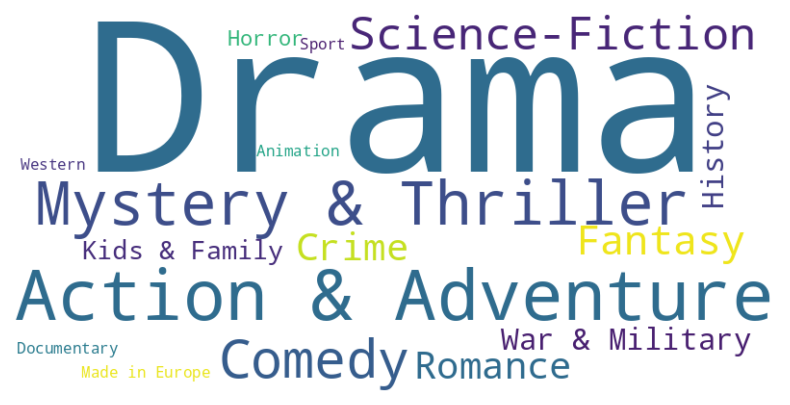

In [ ]:
#Let's Visvalize it using word cloud

# visualizing movies genre counts using wordcloud:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generating word cloud:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(movies_genre_counts)

# Ploting word cloud:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Extracting each show genre in each row of the column:
shows_genre = df_shows['Genre'].str.split(', ', expand=True).stack()

In [ ]:
# Printing shows genre counts:
shows_genre_counts = shows_genre.value_counts()
shows_genre_counts

                      88
Drama                 41
Crime                 22
Action & Adventure    20
Mystery & Thriller    20
Comedy                12
Science-Fiction       11
Fantasy               10
Kids & Family          4
Animation              4
War & Military         3
History                2
Romance                2
Made in Europe         2
Western                1
Documentary            1
dtype: int64

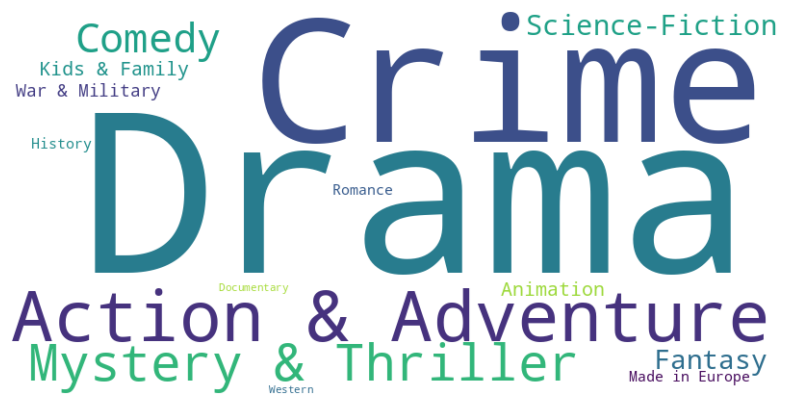

In [ ]:
# visualizing movies genre counts using wordcloud:

# Generating word cloud:
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(shows_genre_counts)

# Ploting word cloud:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
# Counting each movies provider:
movies_provider = df_movies['Provider']
movies_provider_counts = movies_provider.value_counts()
# Printing movies provider counts:
movies_provider_counts


Apple TV              11
Netflix                9
Amazon Prime Video     9
Bookmyshow             9
Zee5                   2
Hotstar                1
Sun Nxt                1
Sony Liv               1
Jio Cinema             1
Name: Provider, dtype: int64

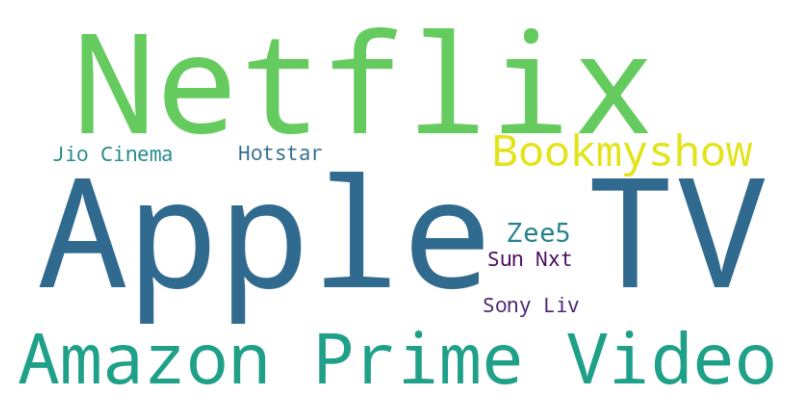

In [ ]:
#Let's Visvalize it using word cloud

wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(movies_provider_counts)

# Ploting word cloud:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
# Counting each tv-show provider:
shows_provider = df_shows['Provider']
shows_provider_counts = shows_provider.value_counts()
shows_provider_counts

Netflix               13
Amazon Prime Video     8
Hotstar                7
Jio Cinema             6
Sony Liv               3
Crunchyroll            2
VI movies and tv       1
MX Player              1
Alt Balaji             1
Apple TV Plus          1
Lionsgate Play         1
Amazon miniTV          1
Apple TV               1
Zee5                   1
Name: Provider, dtype: int64

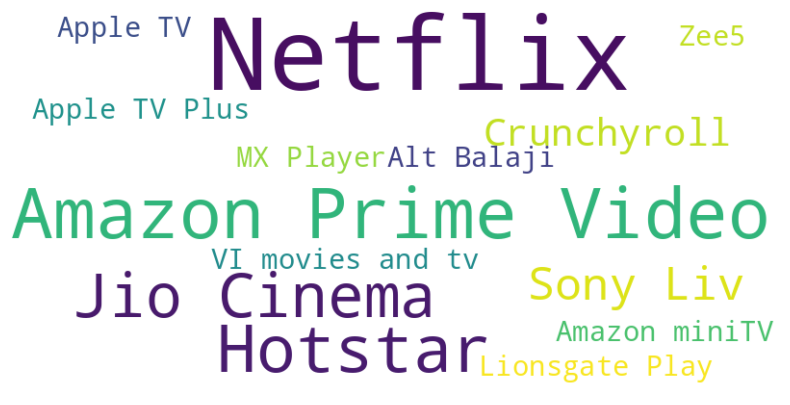

In [ ]:
# visualizing tv-shows provider counts using wordcloud:

# Generating word cloud:
wordcloud4 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(shows_provider_counts)

# Ploting word cloud:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
# Mounting drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#saving filter data as Filter Data in csv format
# saving final dataframe of movies as Final Data in csv format:
df_movies.to_csv('/content/drive/MyDrive/df_movies.csv', index=False)

In [ ]:
# saving final dataframe of tv-shows as Final Data in csv format:
df_shows.to_csv('/content/drive/MyDrive/df_shows.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

Tv shows Dataset - https://drive.google.com/file/d/1-DM7GOyGS8-VENodOH1F6iZZqwZbBO2R/view?usp=sharin

Movie Dataset - https://drive.google.com/file/d/1vdeE3I3wsGrN3eXsTPpDrZkNMs5MWPAC/view?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***